<a href="https://colab.research.google.com/github/Nyraa1/MLProjectsRepo/blob/master/Employee_details_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset=pd.read_excel('Employee_Data.xls')

In [ ]:
dataset.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [ ]:
mydata=dataset.copy()
mydata.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [ ]:
print(dataset.shape)

(100, 7)


In [ ]:
dataset.columns

Index(['Employee Id', 'First Name', 'Last Name', 'Department', 'Age',
       'Experience', 'Salary'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [ ]:
dataset.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department     19
Age            18
Experience     10
Salary          0
dtype: int64

In [ ]:
dataset.isnull().sum()/len(dataset)*100

Employee Id     0.0
First Name      0.0
Last Name       0.0
Department     19.0
Age            18.0
Experience     10.0
Salary          0.0
dtype: float64

In [ ]:
# missing data % is less than 25% so we will do imputation

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [ ]:
#Department is object so we will use mode
dataset['Department'].value_counts()

Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [ ]:
dataset['Department']=dataset['Department'].fillna('Sales and Marketing')

In [ ]:
dataset['Department'].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

<AxesSubplot:ylabel='Age'>

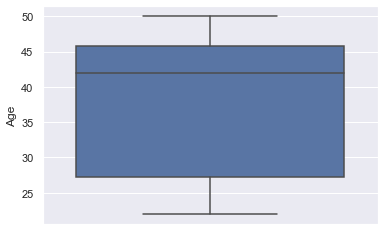

In [ ]:
#Age and Experience - number value
#mean or median based on outlier
#if outlier present - median else mean
sns.boxplot(y='Age',data=dataset)

In [ ]:
#there is no outlier for Age so mean method

<AxesSubplot:ylabel='Experience'>

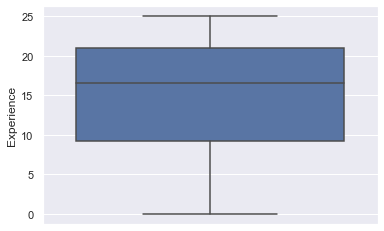

In [ ]:
sns.boxplot(y='Experience',data=dataset)

In [ ]:
#there is no outlier for Experience so mean method

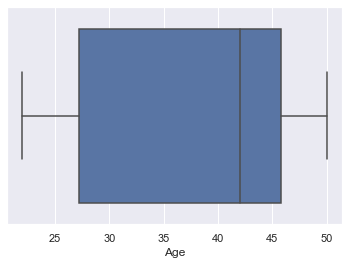

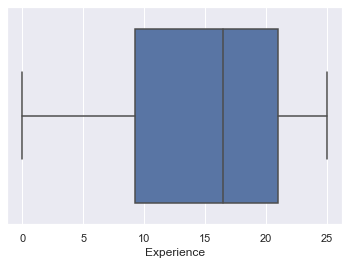

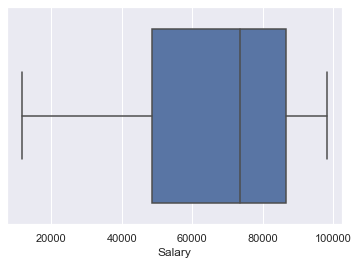

In [ ]:
#to do boxplot for all columns in the dataset
def boxplot(col):
    sns.boxplot(dataset[col])
    plt.show()

for i in list(dataset.select_dtypes(exclude=['object']).columns)[1:]:
    boxplot(i)

In [ ]:
dataset.dtypes

Employee Id      int64
First Name      object
Last Name       object
Department      object
Age            float64
Experience     float64
Salary           int64
dtype: object

In [ ]:
dataset.describe()

,Employee Id,Age,Experience,Salary
count,100.000000,82.000000,90.000000,100.000000
mean,50.500000,37.975610,14.766667,65066.760000
std,29.011492,9.515388,6.889252,26189.874212
min,1.000000,22.000000,0.000000,11830.000000
25%,25.750000,27.250000,9.250000,48526.000000
50%,50.500000,42.000000,16.500000,73500.500000
75%,75.250000,45.750000,21.000000,86621.250000
max,100.000000,50.000000,25.000000,98180.000000


In [ ]:
dataset['Age']=dataset['Age'].fillna(dataset['Age'].mean())

In [ ]:
dataset['Experience']=dataset['Experience'].fillna(dataset['Age'].mean())

In [ ]:
dataset.isnull().sum()

Employee Id    0
First Name     0
Last Name      0
Department     0
Age            0
Experience     0
Salary         0
dtype: int64

In [ ]:
#Automated step for missing value handling using sklearn
from sklearn.impute import SimpleImputer
simple_imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
x=mydata.iloc[:,4:].values
x
x=simple_imputer.fit_transform(x)


In [ ]:
pd.DataFrame(x).isnull().sum()

0    0
1    0
2    0
dtype: int64

In [ ]:
#Encoding part
dataset_1=dataset.iloc[:,3:]
dataset_1

,Department,Age,Experience,Salary
0,Sales and Marketing,28.0,3.0,32889
1,Sales and Marketing,22.0,1.0,15944
2,Customer Relations,22.0,1.0,40343
3,Customer Relations,22.0,1.0,19018
4,Accounting,27.0,0.0,24795
...,...,...,...,...
95,Sales and Marketing,47.0,22.0,79077
96,Sales and Marketing,46.0,20.0,81187
97,Customer Relations,44.0,18.0,83847
98,Customer Relations,47.0,22.0,89158


In [ ]:
dataset_1.isnull().sum()

Department    0
Age           0
Experience    0
Salary        0
dtype: int64

In [ ]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Department  100 non-null    object 
 1   Age         100 non-null    float64
 2   Experience  100 non-null    float64
 3   Salary      100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


In [ ]:
dataset_1['Department'].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [ ]:
#label encoder

In [ ]:
dataset_1['Department']=dataset_1['Department'].astype('category')
dataset_1['Department']=dataset_1['Department'].cat.codes
dataset_1

,Department,Age,Experience,Salary
0,2,28.0,3.0,32889
1,2,22.0,1.0,15944
2,1,22.0,1.0,40343
3,1,22.0,1.0,19018
4,0,27.0,0.0,24795
...,...,...,...,...
95,2,47.0,22.0,79077
96,2,46.0,20.0,81187
97,1,44.0,18.0,83847
98,1,47.0,22.0,89158


In [ ]:
#one hot encoder
dataset_1=pd.get_dummies(dataset_1,columns=['Department'])

In [ ]:
dataset_1

,Age,Experience,Salary,Department_0,Department_1,Department_2
0,28.0,3.0,32889,0,0,1
1,22.0,1.0,15944,0,0,1
2,22.0,1.0,40343,0,1,0
3,22.0,1.0,19018,0,1,0
4,27.0,0.0,24795,1,0,0
...,...,...,...,...,...,...
95,47.0,22.0,79077,0,0,1
96,46.0,20.0,81187,0,0,1
97,44.0,18.0,83847,0,1,0
98,47.0,22.0,89158,0,1,0


In [ ]:
#dummy variable:
dataset_1=dataset_1.drop(['Department_2'],axis=1)

In [ ]:
dataset_1

,Age,Experience,Salary,Department_0,Department_1
0,28.0,3.0,32889,0,0
1,22.0,1.0,15944,0,0
2,22.0,1.0,40343,0,1
3,22.0,1.0,19018,0,1
4,27.0,0.0,24795,1,0
...,...,...,...,...,...
95,47.0,22.0,79077,0,0
96,46.0,20.0,81187,0,0
97,44.0,18.0,83847,0,1
98,47.0,22.0,89158,0,1


# Feature scaling

# 1.Standardisation
2.normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_fs_stand=sc_x.fit_transform(dataset_1)

In [ ]:
x_fs_stand

array([[-1.16485118e+00, -1.47905526e+00, -1.23482325e+00,
        -6.08163641e-01, -5.61951487e-01],
       [-1.86547071e+00, -1.68903557e+00, -1.88508853e+00,
        -6.08163641e-01, -5.61951487e-01],
       [-1.86547071e+00, -1.68903557e+00, -9.48775604e-01,
        -6.08163641e-01,  1.77951304e+00],
       [-1.86547071e+00, -1.68903557e+00, -1.76712361e+00,
        -6.08163641e-01,  1.77951304e+00],
       [-1.28162110e+00, -1.79402573e+00, -1.54543093e+00,
         1.64429429e+00, -5.61951487e-01],
       [-1.39839102e+00, -1.26907494e+00, -1.90646343e+00,
         1.64429429e+00, -5.61951487e-01],
       [-1.63193087e+00, -1.16408478e+00, -1.18769869e+00,
        -6.08163641e-01,  1.77951304e+00],
       [-1.04808125e+00, -1.58404541e+00, -1.87914039e+00,
        -6.08163641e-01,  1.77951304e+00],
       [-1.04808125e+00, -1.26907494e+00, -8.81158761e-01,
        -6.08163641e-01, -5.61951487e-01],
       [-9.31311332e-01, -1.16408478e+00, -2.04062262e+00,
        -6.08163641e-01

In [ ]:
#Normalisation

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
x_nor=Normalizer()
x_fs_nor=x_nor.fit_transform(dataset_1)
x_fs_nor

array([[8.51348163e-04, 9.12158746e-05, 9.99999633e-01, 0.00000000e+00,
        0.00000000e+00],
       [1.37982809e-03, 6.27194585e-05, 9.99999046e-01, 0.00000000e+00,
        0.00000000e+00],
       [5.45323767e-04, 2.47874439e-05, 9.99999851e-01, 0.00000000e+00,
        2.47874439e-05],
       [1.15679804e-03, 5.25817293e-05, 9.99999328e-01, 0.00000000e+00,
        5.25817293e-05],
       [1.08892857e-03, 0.00000000e+00, 9.99999406e-01, 4.03306879e-05,
        0.00000000e+00],
       [1.68973559e-03, 3.24949151e-04, 9.99998517e-01, 6.49898302e-05,
        0.00000000e+00],
       [7.03461432e-04, 1.75865358e-04, 9.99999737e-01, 0.00000000e+00,
        2.93108930e-05],
       [1.80135118e-03, 1.24231116e-04, 9.99998368e-01, 0.00000000e+00,
        6.21155580e-05],
       [6.88754136e-04, 1.18750713e-04, 9.99999756e-01, 0.00000000e+00,
        0.00000000e+00],
       [2.52290813e-03, 5.04581626e-04, 9.99996687e-01, 0.00000000e+00,
        8.40969377e-05],
       [7.49560135e-04, 1.4414